In [15]:
# a. Tossing a coin 10,000 times and calculating the experimental probability of heads and tails. 

import random

def coin_toss(n):
    head = 0
    tail = 0

    for _ in range(n):
        toss = random.choice(['Head','Tail'])

        if toss == 'Head':
            head += 1
        else:
            tail += 1

    prob_head = head/n
    prob_tail = tail/n

    print(f"Total toss: {n}")
    print(f"Total heads: {head}")
    print(f"Total Tails: {tail}")
    print(f"Probaility of heads: {prob_head}")
    print(f"Probaility of tails: {prob_tail}")

coin_toss(10000)

Total toss: 10000
Total heads: 4882
Total Tails: 5118
Probaility of heads: 0.4882
Probaility of tails: 0.5118


In [16]:
 #b. Rolling two dice and computing the probability of getting a sum of 7.  
import random

def roll_dice(n):
    sum = 0
    for _ in range(n):
        d1 = random.randint(1,6)
        d2 = random.randint(1,6)

        res = d1+d2

        if res == 7:
            sum += 1

    prob = sum/n

    print(f"Total rolls: {n}")
    print(f"No of times 7 occured: {sum}")
    print(f"probability: {prob}")

roll = int(input("Enter no of trials"))
roll_dice(roll)
    
        

Enter no of trials 10000


Total rolls: 10000
No of times 7 occured: 1678
probability: 0.1678


In [20]:
#Function to estimate the probability of getting at least one "6" in 10 rolls of a fair die. 

import random

def atleast_six(n):
    c = 0
    for _ in range(n):
        six = False
        for _ in range(10):
            if random.randint(1,6) == 6:
                six = True
                break
        if six:
            c += 1
    prob = c/n
    return prob



n = int(input("Enter no of trials:"))

print("Probability:",atleast_six(n))


            
    

Enter no of trials: 10000


Probability: 0.8334


In [36]:
#Conditional Probability and Bayes' Theorem

import numpy as np

#define colors and their probabilities
colors = ['red','green','blue']
prob = [5/20,7/20,8/20]

#simulate 1000 draws
# np.random.seed(40)
draw = np.random.choice(colors,size = 1000,p=prob)

#estimate p(res\previous=blue)
c_blue = 0
c_red_prev_blue = 0

for i in range(1,len(draw)):
    if draw[i-1] == 'blue':
        c_blue += 1
        if draw[i] == 'red':
            c_red_prev_blue += 1

p_red_given_blue = c_red_prev_blue/c_blue if c_blue > 0 else 0

#Baye's Theorem
p_prev_blue = c_blue/len(draw) - 1
p_curr_red = np.sum(draw[1:]== 'red')/len(draw) - 1

c_red = 0
c_red_prev_blue = 0

for i in range(1, len(draw)):
    if draw[i] == 'red':
        c_red += 1
        if draw[i-1] == 'blue':
            c_red_prev_blue += 1
p_prev_blue_given_red_empirical = c_red_prev_blue / c_red if c_red > 0 else 0

# Bayes' Theorem estimate
p_prev_blue_given_red_bayes = (p_red_given_blue * p_prev_blue) / p_curr_red if p_curr_red > 0 else 0

# Output results
print(f"Estimated P(Red | Previous = Blue): {p_red_given_blue:.4f}")
print(f"Empirical P(Previous = Blue | Current = Red): {p_prev_blue_given_red_empirical:.4f}")
print(f"Bayes' Theorem Estimate:                     {p_prev_blue_given_red_bayes:.4f}")




Estimated P(Red | Previous = Blue): 0.2286
Empirical P(Previous = Blue | Current = Red): 0.3776
Bayes' Theorem Estimate:                     0.0000


In [27]:
#Random Variables and Discrete Probability

import numpy as ny

v = [1,2,3]
p1 = [0.25,0.35,0.4]

s = ny.random.choice(v,size = 10000,p= p1)

mean = ny.mean(s)
var = ny.var(s)
emp = ny.std(s)

print(f"Empirical Mean: {mean}")
print(f"Empirical Variance: {var}")
print(f"Empirical Standard Deviation: {emp}")
    

Empirical Mean: 2.1542
Empirical Variance: 0.6236223599999998
Empirical Standard Deviation: 0.7896976383401433


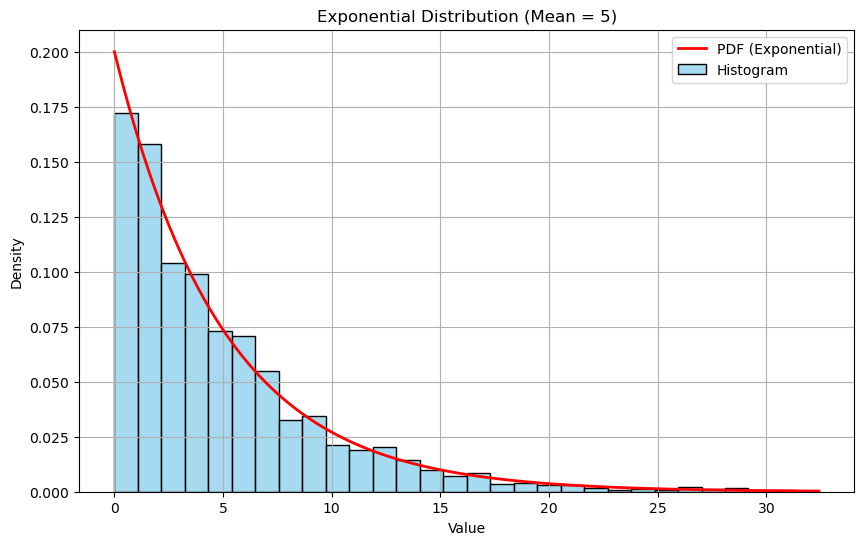

In [42]:
#Continuous Random Variables

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import expon

# Make sure plots show up in the notebook
%matplotlib inline

# Parameters
mean = 5
scale = mean  # scale = 1/lambda
n_samples = 2000

# Simulate samples
samples = np.random.exponential(scale=scale, size=n_samples)

# Plot histogram with PDF
plt.figure(figsize=(10, 6))

# Histogram
sns.histplot(samples, bins=30, kde=False, stat='density', color='skyblue', label='Histogram')

# PDF overlay
x = np.linspace(0, np.max(samples), 1000)
pdf = expon.pdf(x, scale=scale)
plt.plot(x, pdf, 'r', label='PDF (Exponential)', linewidth=2)

# Plot settings
plt.title('Exponential Distribution (Mean = 5)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

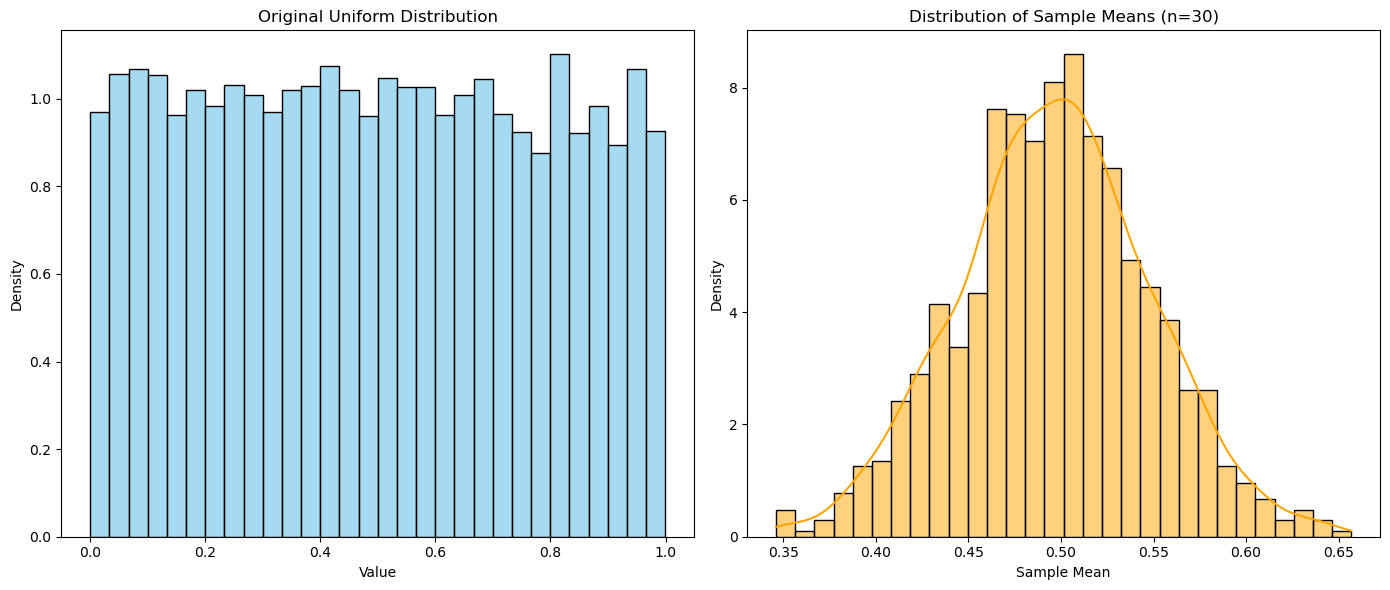

In [43]:
# Central Limit Theorem

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

uniform_data = np.random.uniform(low=0.0, high=1.0, size=10000)

n_samples = 1000
sample_size = 30

sample_means = []

for _ in range(n_samples):
    sample = np.random.choice(uniform_data, size=sample_size)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)

plt.figure(figsize=(14, 6))

# Plot 1: Uniform distribution
plt.subplot(1, 2, 1)
sns.histplot(uniform_data, bins=30, kde=False, color='skyblue', stat='density')
plt.title("Original Uniform Distribution")
plt.xlabel("Value")
plt.ylabel("Density")

# Plot 2: Sample mean distribution
plt.subplot(1, 2, 2)
sns.histplot(sample_means, bins=30, kde=True, color='orange', stat='density')
plt.title("Distribution of Sample Means (n=30)")
plt.xlabel("Sample Mean")
plt.ylabel("Density")

plt.tight_layout()
plt.show()